In [120]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np

# Loads the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [121]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [122]:
y.shape

(70000,)

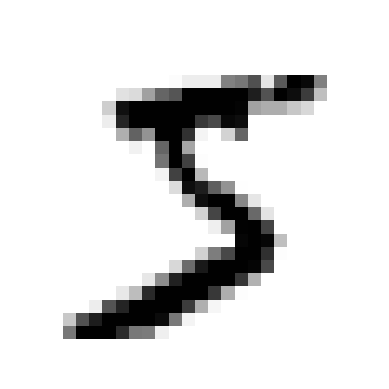

In [123]:
some_digit = X.loc[0].to_numpy()
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [124]:
y[0]

'5'

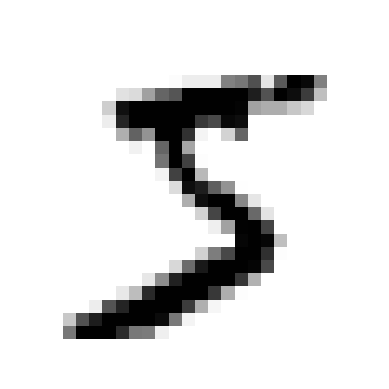

In [125]:
# Testing another example going for "7":

some_digit2 = X.loc[15].to_numpy()
some_digit2_image = some_digit.reshape(28, 28)

plt.imshow(some_digit2_image, cmap="binary")
plt.axis("off")
plt.show()

In [126]:
y[15]

'7'

In [127]:
y = y.astype(np.uint8)

In [128]:
# Splitting into test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#

### Training a Binary Classifier

In [129]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

In [130]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [131]:
sgd_clf.predict([some_digit])

c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [132]:
y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)

In [133]:
# Testing the example from before for "7":

sgd_clf2 = SGDClassifier(random_state=42)
sgd_clf2.fit(X_train, y_train_7)

SGDClassifier(random_state=42)

In [134]:
sgd_clf.predict([some_digit2])


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

#

### Performance Measures

#### Measuring Accuracy Using Cross-Validation

> Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting, ie, failing to generalize a pattern.

Example of Cross-validatipm for 4-folds:

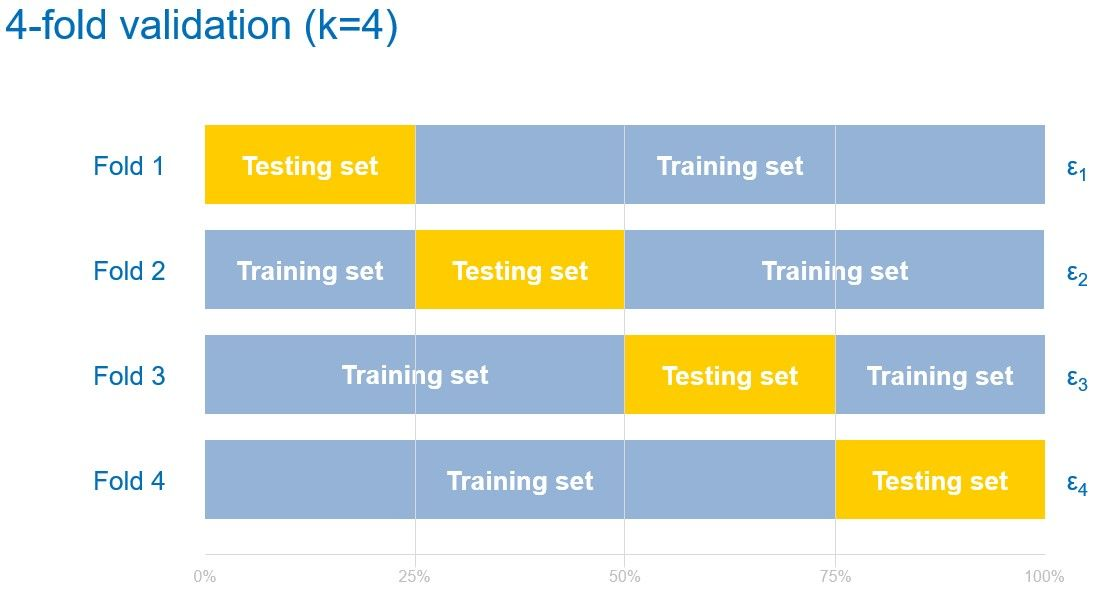

In [135]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [137]:
# Our own cross-validation function.

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


##### Stratified Sampling
> A method of sampling that involves the division of a population into smaller sub-groups known as strata.

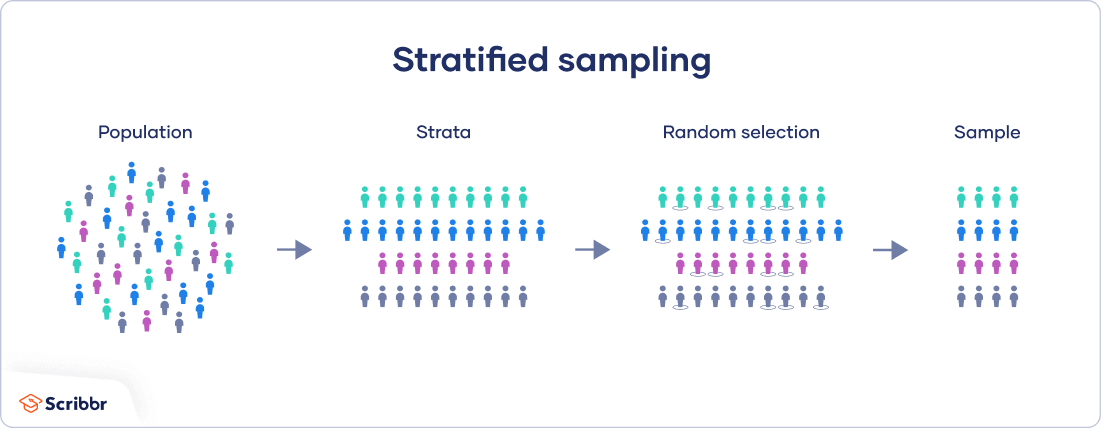

In [ ]:
# Using Scikit-Learn's cross_val_score() function:
